In [70]:
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
from scipy import linalg
from scipy import optimize
import sympy as sm
from sympy import *

# Model description: The Keyniesian cross and the IS-LM model

## Keyniesian cross
The Keynasian cross is a part of Keynes general theory. It proposed that an economy’s total income was, in the short run, determined largely by the spending plans of households, businesses, and government. The more people want to spend, the more goods and services firms can sell. Keynes believed that the problem during recessions and depressions was inadequate spending. The Keynesian cross is an attempt to model this insight.

**Structure of the model**

The planned expenditure is determined as: 

$$ AD = C + I + G + NX $$

To this equation we add the consumption function:

$$ C = a + b(Y-T),    a>0,    0<b<1 $$

This equation states that concumption depends on disposable income, and is a linear function. b is the marginal consumption rate. Further more we take planned investment as exogenously fixed, and negatively related to the rate of interest: 

$$ I = \bar{I} - di $$
Because of the free capital movement, the real domestic interest rate equals the real foreign interest rate, $r^*$

$$ r = \bar{r^*} $$

Furter more we assume that governments puchases and taxes are fixed 

$$ T = \bar{T} $$

$$ G = \bar{G} $$

Combining these eqations we get 

$$ AD = a + b(Y- \bar{T}) + \bar{I} - di + \bar{G} + NX $$

This equation shows that planned expenditure is a function of income Y, the 
level of planned investment I , the fiscal policy variables G and T and the net export NX. 
The Keynesian cross is in equilibrium when actual expenditure equals planned expenditure

$$ Y = AD $$ 

### Keynesian cross equilibrium analysis

In [71]:
# we define the symbols 
Y = sm.symbols('Y')
C = sm.symbols('C')
PE = sm.symbols('PE')
T = sm.symbols('T')
I = sm.symbols('I')
G = sm.symbols('G')
NX = sm.symbols('NX')
d = sm.symbols('d')
i = sm.symbols('i')
a = sm.symbols('a')
b = sm.symbols('b')

In [72]:
# We now set Y=AD to solve for Y
eq_AD = sm.Eq(Y, a + b*(Y-T) + I-(d*i) + G + NX)
eq = sm.solve(eq_AD, Y)[0]

yeq = sm.factor(eq)
print('Y =')
yeq

Y =


-(G + I + NX - T*b + a - d*i)/(b - 1)

We have now found the equilibrium for Y. We now want to plot the keynesian cross

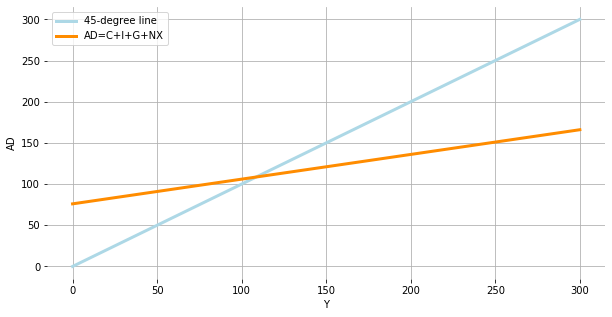

In [75]:
# Define the values for our parameters
T = 30
I = 40
G = 30
NX = 10
a = 30
b = 0.3
d = 5
i = 5

# The data for production and AD is plotted
Y_arrey = np.linspace(0,300)
AD_arrey = (a + b * (Y_arrey - T) + I - d*i + G + NX)
degree = Y_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(Y_arrey, degree, label="45-degree line", color='lightblue',linewidth=3)
ax.plot(Y_arrey, AD_arrey, label="AD=C+I+G+NX", color='darkorange',linewidth=3)

ax.set_xlabel("Y")
ax.set_ylabel("AD")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [76]:
Y = -(G + I + NX - T*b + a - d*i)/(b-1)
print ('The equilibrium for the Keynesian cross is')
Y

The equilibrium for the Keynesian cross is


108.57142857142858

### An Increase in Government Purchases in the Keynesian Cross 
We now want to examine how goverment purchase effects the  equilibrium of the economy, because higher government expenditure results in higher planned ecpenditure. We'll therefore examine hov big of a change a movement in G will make in Y. 

In [77]:
del G
G = sm.symbols('G')
diff_Y = sm.diff(yeq, G)
print('Y will change by')
diff_Y

Y will change by


-1/(b - 1)

Where b is the marginal propensity to consume. 

In [78]:
#the increase is set:
G_change = -(1/(b-1))
print('This means when G rises by 1 amount, Y will rise by')
G_change 

This means when G rises by 1 amount, Y will rise by


1.4285714285714286

We now want to compare our old equilibrium with our new equilibrium  (higher public expenditure)

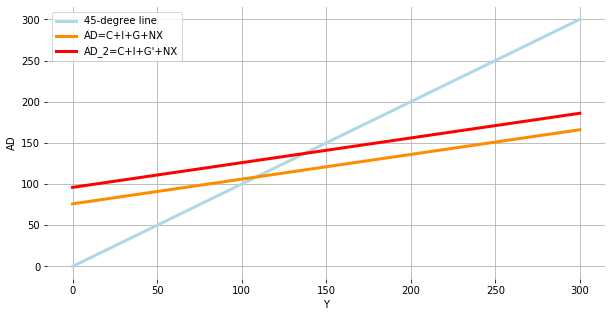

In [79]:
# New G:
G = 30
#Public expenditure rises by amount 20
delta_G = 20
G_new = G + delta_G

# The data for production and AD is plotted
Y_arrey = np.linspace(0,300)
AD_arrey_new = (a + b * (Y_arrey - T) + (I - d*i) + G_new + NX)
degree = Y_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(Y_arrey, degree, label="45-degree line", color='lightblue',linewidth=3)
ax.plot(Y_arrey, AD_arrey, label="AD=C+I+G+NX", color='darkorange',linewidth=3)
ax.plot(Y_arrey, AD_arrey_new, label="AD_2=C+I+G'+NX", color='red',linewidth=3)

ax.set_xlabel("Y")
ax.set_ylabel("AD")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [80]:
Y_G = -(G_new + I + NX - T*b + a - d*i)/(b-1)
print('The equilibrium have risen to')
Y_G

The equilibrium have risen to


137.14285714285714

In [81]:
change_G = Y_G - Y
print('The equlibrium have changed by')
change_G

The equlibrium have changed by


28.571428571428555

### A Decrease in Taxes in the Keynesian Cross 
We now want to examine how a decrease in taxes in the Keynesian cross will affect the equilibrium of the economy, because lower taxes results in higher planned ecpenditure. We'll therefore examine hov big of a change a movement in T will make in Y. 

In [82]:
del T
T = sm.symbols('T')
diff_Y = sm.diff(yeq, T)
print('Y will change by')
diff_Y

Y will change by


b/(b - 1)

Higher taxes has a negative effect on Y, because 0<b<1

In [84]:
#the increase is set:
T_change = -(b/(b-1))
print('This means when T falls by 1 amount, Y will rise by')
T_change

This means when T falls by 1 amount, Y will rise by


0.4285714285714286

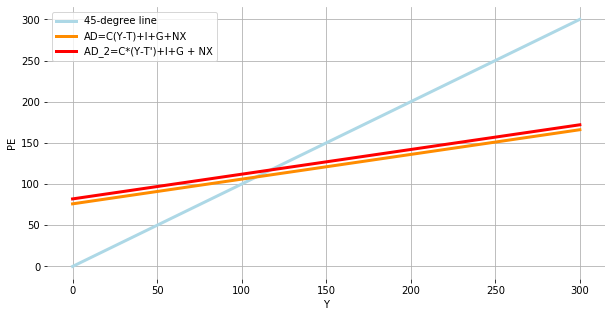

In [85]:
# New T:
T = 30
#Taxs falls by amount 20
delta_T = -20
T_new = T + delta_T

# The data for production and AD is plotted
Y_arrey = np.linspace(0,300)
AD_arrey_new_2 = (a + b*(Y_arrey - T_new) + (I - d*i) + G + NX)
degree = Y_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(Y_arrey, degree, label="45-degree line", color='lightblue',linewidth=3)
ax.plot(Y_arrey, AD_arrey, label="AD=C(Y-T)+I+G+NX", color='darkorange',linewidth=3)
ax.plot(Y_arrey, AD_arrey_new_2, label="AD_2=C*(Y-T')+I+G + NX", color='red',linewidth=3)


ax.set_xlabel("Y")
ax.set_ylabel("PE")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [86]:
Y = -(G + I + NX - T_new*b + a - d*i)/(b-1)
print('The equilibrium have risen to')
Y

The equilibrium have risen to


117.14285714285715

It's clear to see that a rise in public expenditure has a bigger effect on equilibrium, since 117.1 < 137.1

## The IS-curve
The Keynesian cross is only a stepping-stone on our path to the IS–curve, which explains the economy’s aggregate demand curve. The Keynesian cross is useful because it shows how the spending plans of households, firms, and the government determine the economy’s income. We'll now derive the IS-curve from the AD-curve

$$Y-bY=a+b\bar{T}+\bar{I}-di+\bar{G}+NX$$

$$Y(1-b)=a+b\bar{T}+\bar{I}-di+\bar{G}+NX$$

$$Y=\frac{1}{1-b}(a+\bar{I}+\bar{G}+NX)-\frac{1}{1-b}(b\bar{T}+di)$$

Our function for IS depends on the variables from the Keynesian cross. We can therefore define our function.

In [54]:
# We'll now define our function for the IS-curve
del i
i = sm.symbols('i')
Y_IS = (1/(1-b))*(a+I+G+NX)-(1/(1-b))*(b*T+d*i)
print('The function for the IS-curve =')
Y_IS

The function for the IS-curve =


144.285714285714 - 7.14285714285714*i

## The LM-curve
Having derived algebraically equation for IS curve we now turn to the derivation of equation for LM curve. It will be recalled that LM curve is a curve that shows combinations of interest rates and levels of income at which money market is in equilibrium, that is, at which demand for money equals supply of money. Let us assume that money demand function is linear. Then:

$$ L(Y,i)=kY-hik, h > 0 $$

Parameter k represents how much demand for real money balances increases when level of income rises. Parameter h represents how much demand for real money balances decreases when rate of interest rises.
The equilibrium in the money market is established where demand for real money balances equals supply of real money balances and is given by

$$ M/P = kY – hi $$

Solving equation above for interest rate, we'll get 

$$i = 1/h (kY – M/P) $$

The above equation describes the equation for the LM-curve. To be precise it gives us the equilibrium interest rate for any given value of level of income (Y) and real money balances. For the money market to be in equilibrium we have that:

$$M_d=M_s$$

Where $M_d$ is the demand for money, and $M_s$ is the rate of interest. We have that:

$$M_d=Y–2i$$

$$M_s=20$$

The solution is:

$$Y=20+2i$$

In [55]:
# We'll now define our function for the LM-curve
Y_LM = 20 + 2*i
print('The function for the LM-curve =')
Y_LM

The function for the LM-curve =


2*i + 20

## The IS-LM model
We'll now put the IS- and LM curve together. The IS-LM model shows the relationship between interest rates and output. 

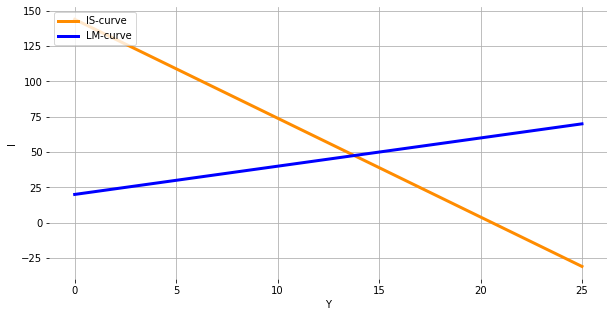

In [87]:
# The functions
I_arrey = np.linspace(0,25)
IS_arrey = 144-7*I_arrey
LM_arrey = 20+2*I_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(I_arrey, IS_arrey, label="IS-curve", color='darkorange',linewidth=3)
ax.plot(I_arrey, LM_arrey, label="LM-curve", color='blue',linewidth=3)

ax.set_xlabel("Y")
ax.set_ylabel("I")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

The equilibrium is 13.7. This means that the economy are in equiibrium when output is equal to 13.7.

## An Increase in Government Purchases in the IS-LM model
We'll now examine how a change in public expenditure will effect the IS-LM curve. We'll change it with the amount 20 - the same for the keynisian cross

In [88]:
# We'll now define our new function for the IS-curve when we change the public expenditure
del i
i = sm.symbols('i')
Y_IS_G = (1/(1-b))*(a+I+G_new+NX)-(1/(1-b))*(b*T+d*i)
print('The function for the new IS-curve =')
Y_IS_G

The function for the new IS-curve =


172.857142857143 - 7.14285714285714*i

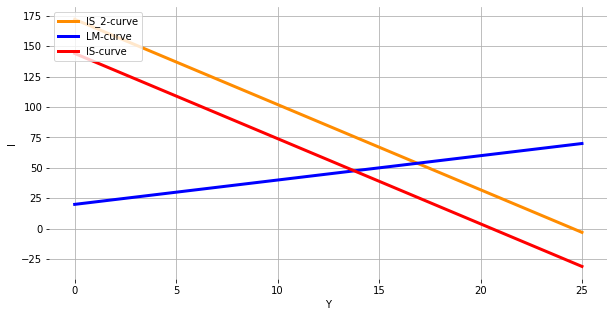

In [89]:
# The functions
I_arrey = np.linspace(0,25)
IS_arrey_G = 172-7*I_arrey
LM_arrey_G = 20+2*I_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(I_arrey, IS_arrey_G, label="IS_2-curve", color='darkorange',linewidth=3)
ax.plot(I_arrey, LM_arrey_G, label="LM-curve", color='blue',linewidth=3)
ax.plot(I_arrey, IS_arrey, label="IS-curve", color='red',linewidth=3)

ax.set_xlabel("Y")
ax.set_ylabel("I")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

The new equilibrium is 16.8. We can therefore conclude that a rise in public expenditure rises output and the interest rate. 

# Extension
We will now analyze how much a change in public expenditure makes on output in Keynes cross, and the IS-LM model, when we have respectively a lump sum tax, and taxes levied as proportion of income. 
For lump sum taxes we assume that the consumption function is defined as:

$$C=a+b(Y-T+R)$$

Where R is the lump sum. If we assume proportionate income tax, then consumption is defined as:

$$C=a+b(Y-tY)$$

## Lump sum

### Lump Sum equilibrium analysis

In [90]:
del a
del b
del Y
del T
del I
del d
del G
del NX
a = sm.symbols('a')
b = sm.symbols('b')
Y = sm.symbols('Y')
T = sm.symbols('T')
I = sm.symbols('I')
d = sm.symbols('d')
G = sm.symbols('G')
NX = sm.symbols('NX')
R = sm.symbols('R')

#We now set Y=AD to solve for Y
eq_AD_Lump = sm.Eq(Y, a + b*(Y-T+R) + I-(d*i) + G + NX)
eq_Lump = sm.solve(eq_AD_Lump, Y)[0]

yeq_Lump = sm.factor(eq_Lump)
print('Y =')
yeq_Lump

Y =


-(G + I + NX + R*b - T*b + a - d*i)/(b - 1)

We have now found the equilibrium for Y when implementing a lump sum tax. We want solve for how much a public expentuture makes in Y

In [60]:
diff_Y_Lump = sm.diff(yeq_Lump, G)
print('Y will change by')
diff_Y_Lump

Y will change by


-1/(b - 1)

This is exactly the same the change as with no lump sum tax. We'll therefore look at the change in Y for a proportionel income tax.

## Proportionate income tax

### Proportionate income tax equilirium analysis 

In [91]:
del a
del b
del Y
del T
del I
del d
del G
del NX
a = sm.symbols('a')
b = sm.symbols('b')
Y = sm.symbols('Y')
T = sm.symbols('T')
I = sm.symbols('I')
d = sm.symbols('d')
G = sm.symbols('G')
NX = sm.symbols('NX')
R = sm.symbols('R')

#We now set Y=PE to solve for Y
t = sm.symbols('t')
eq_AD_Prop = sm.Eq(Y, a + b*(Y-t*Y) + I-(d*i) + G + NX)
eq_Prop = sm.solve(eq_AD_Prop, Y)[0]

yeq_Prop = sm.factor(eq_Prop)
print('Y =')
yeq_Prop

Y =


(G + I + NX + a - d*i)/(b*t - b + 1)

We have now found the equilibrium for Y when implementing a proportionate income tax. We now want solve for how big a change public expentuture makes in Y.

In [92]:
diff_Y_Prop = sm.diff(yeq_Prop, G)
print('Y will change by')
diff_Y_Prop

Y will change by


1/(b*t - b + 1)

We can see that the new slope is less steep. This means that the multiplicator effect is smaller.

### An Increase in Government Purchases in the Keynesian Cross with proportionate income tax

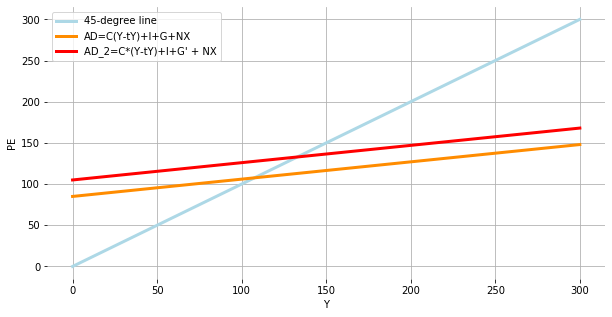

In [94]:
# Define the values for our parameters
T = 30
I = 40
G = 30
NX = 10
a = 30
b = 0.3
d = 5
i = 5
t = 0.3

Y_arrey = np.linspace(0,300)
AD_arrey_Prop = (a + b*(Y_arrey - t*Y_arrey) + I - d*i + G + NX)
AD_arrey_Prop_new = (a + b*(Y_arrey - t*Y_arrey) + I - d*i + G_new + NX)
degree = Y_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(Y_arrey, degree, label="45-degree line", color='lightblue',linewidth=3)
ax.plot(Y_arrey, AD_arrey_Prop, label="AD=C(Y-tY)+I+G+NX", color='darkorange',linewidth=3)
ax.plot(Y_arrey, AD_arrey_Prop_new, label="AD_2=C*(Y-tY)+I+G' + NX", color='red',linewidth=3)


ax.set_xlabel("Y")
ax.set_ylabel("PE")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

In [95]:
Y_Prop = (G + I + NX + a - d*i)/(b*t-b+1)
Y_Prop_new = (G_new + I + NX + a - d*i)/(b*t-b+1)
print('The old equilibrium for the economy with proportionate income tax, but without public expenditure was')
Y_Prop

The old equilibrium for the economy with proportionate income tax, but without public expenditure was


107.59493670886076

In [96]:
print('The new equilibrium for the economy with proportionate income tax, and with public expenditure is')
Y_Prop_new

The new equilibrium for the economy with proportionate income tax, and with public expenditure is


132.91139240506328

In [97]:
change_prop = Y_Prop_new - Y_Prop
print('The change is')
change_prop

The change is


25.316455696202524

Because of the dependent tax, the shift in the total production is smaller 25.3 < 28.57. 

### An Increase in Government Purchases in the IS-LM model with proportionate income tax
We'll now find our new function for the IS-curve.

In [98]:
# We'll now define our function for the IS-curve
del i
i = sm.symbols('i')
Y_IS = (1/(b*t-b+1))*(a+I+G+NX-d*i)
print('The function for the IS-curve =')
Y_IS

The function for the IS-curve =


139.240506329114 - 6.32911392405063*i

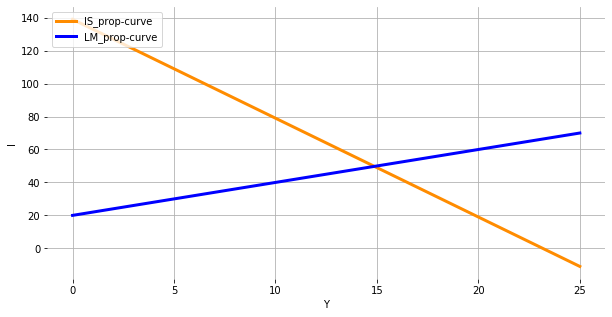

In [100]:
# The functions
I_arrey = np.linspace(0,25)
IS_arrey_prop = 139-6*I_arrey
LM_arrey_prop = 20+2*I_arrey

# The figure
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1,1,1)

ax.plot(I_arrey, IS_arrey_prop, label="IS_prop-curve", color='darkorange',linewidth=3)
ax.plot(I_arrey, LM_arrey_prop, label="LM_prop-curve", color='blue',linewidth=3)

ax.set_xlabel("Y")
ax.set_ylabel("I")
ax.legend(loc="upper left")

ax.grid()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

The equlibrium is equal to 14.8. It's clear to see that a proportionate income tax have a smaller effect on the economy when changing the public expenditure, because 14.8 < 16.8

# Conclusion 
We can therefore conclude that a rise in government purchase have a bigger effect on production than a fall in taxes. Furthermore we can conclude that implementation of a lump sum tax will not have any effect, when changing the public expenditure. However a proportionate income tax have an effect. By including a proportionate income tax, the economy gets more stable and shifts in exogenous variables have a smaller effect on the economy.

